# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Таблица состоит из 22 столбцов :

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип) - нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Ознакомились с данными и изучили их структуру. Видим, что в данных много пропущенных значений, займёмся их обработкой.

### Шаг 2. Предобработка данных

Пропуски найдены в следующих столбцах (здесь же я указала тип переменной для определения способа обработки пропущенных значений):

- ceiling_height - количественная
- floors_total - количественная
- living_area - количественная
- is_apartment - качественная
- kitchen_area - количественная
- balcony- количественная
- locality_name - качественная
- airports_nearest - количественная
- cityCenters_nearest - количественная
- parks_around3000 - количественная
- parks_nearest - количественная
- ponds_around3000 - количественная
- ponds_nearest - количественная
- days_exposition - количественная

Логично предположить, что если в столбцах balcony, parks_around3000, ponds_around3000 не указали данные, то истинное значение здесь равно 0, так как балконов у квартиры / водоемов или парков поблизости нет. Заменим пропуски на 0, а заодно изменим тип данных на int, так как вещественного типа данных здесь быть не может.

In [6]:
real_estate['balcony'] = real_estate['balcony'].fillna(0).astype(int)
real_estate['parks_around3000'] = real_estate['parks_around3000'].fillna(0).astype(int)
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].fillna(0).astype(int)

От наблюдений с пустыми значениями floors_total и locality_name избавимся, так как отсутствие этих данных помешает нам в дальнейших рассчётах. Для заполенения столбца locality_name нам бы могли понадобиться адрес или почтовый индекс квартиры, а для floors_total - высота дома.

In [7]:
real_estate.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest заменим на нетипичные значения и будем учитывать в дальнейших рассчётах.

In [8]:
real_estate['airports_nearest'] = real_estate['airports_nearest'].fillna(-1)
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'].fillna(-1)
real_estate['parks_nearest'] = real_estate['parks_nearest'].fillna(-1)
real_estate['ponds_nearest'] = real_estate['ponds_nearest'].fillna(-1)
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(-1).astype(int)

Мы бы могли обработать пропуски в расстоянии до центра cityCenters_nearest сгруппировав объявления по названию населенного пункта locality_name, а затем высчитав медиану или среднее арифметическое, однако такой способ не сработает - для некоторых населенных пунктов (как городской посёлок Янино-1, к примеру), не дано расстояние до центра города, так как центра, скорее всего, нет. Поэтому, если мы будем пытаться заменить нетипичные значения (-1) на медиану или среднее, то результатом все равно окажется -1. В этом случае отсутсвие информации - это информация.

Можем предположить, что объявления с пропусками в days_exposition все ещё активны. Их можем попробовать обработать с помощью столбца locality_name.

In [9]:
def fill_days_exposition(row):
    days_exposition = row['days_exposition']
    locality_name = row['locality_name']
    if days_exposition == -1:      
        return locality_name_to_median[locality_name]
    return days_exposition
 
locality_name_to_median = real_estate.groupby('locality_name').median()['days_exposition'].to_dict()    
       
real_estate['days_exposition'] = real_estate.apply(fill_days_exposition, axis=1)

In [10]:
real_estate.query('days_exposition == -1')['days_exposition'].count()

100

Такое заполнение более эффективно, но после него пропуски все еще остались, заполним их медианным значением по всему столбцу.

In [11]:
real_estate.loc[real_estate['days_exposition'] == -1] = real_estate['days_exposition'].median()
real_estate.query('days_exposition == -1')['days_exposition'].count()

0

В столбце is_apartment слишком мало ненулевых значений, у тому же, в процессе работы над проектом мы не будем использовать этот столбец, поэтому от него можно избавиться. Также можно избавиться от столбцов total_images, studio и open_plan - в дальнейшей работе они нам не понадобятся.

In [12]:
real_estate.drop(['is_apartment'], axis='columns', inplace=True)
real_estate.drop(['total_images'], axis='columns', inplace=True)
real_estate.drop(['studio'], axis='columns', inplace=True)
real_estate.drop(['open_plan'], axis='columns', inplace=True)

Значение пропусков в столбце living_area посчитаем с помощью медианы, предварительно заменив NaN значения на нетипичные и сгруппировав по общей площади квартиры. Для начала приведем значения в total_area к типу int для удобства подсчёта.

In [13]:
real_estate['total_area'] = real_estate['total_area'].round().astype(int)

In [14]:
real_estate['living_area'] = real_estate['living_area'].fillna(-1)

In [15]:
def count_living_area(row):
    living_area = row['living_area']
    total_area = row['total_area']
    if living_area == -1:      
        return total_area_to_median[total_area]
    return living_area
 
total_area_to_median = real_estate.groupby('total_area').median()['living_area'].to_dict()    
       
real_estate['living_area'] = real_estate.apply(count_living_area, axis=1)

In [16]:
len(real_estate.query('living_area == -1'))

19

Функция сработала не во всех случаях, несколько ячеек в living_area всё ещё равны -1, для них не нашлось медианы. Эти значения выбиваются из общих данных, и их совсем мало - избавимся от них.

In [17]:
real_estate = real_estate[real_estate['living_area'] != -1]

Чтобы заполнить NaN значения в kitchen_area, найдем коэффициент корреляции для kitchen_area с total_area, чтобы выявить взаимосвязь этих параметров, и если она достаточно сильна, то найдем, какую часть общей площади занимает кухня. Этот параметр добавим в таблицу как kitchen_part, найдем среднее арифметическое по этому столбцу, а затем заполним по нему пропуски.

In [18]:
total_to_kitchen_area_corr = real_estate['total_area'].corr(real_estate['kitchen_area'])
total_to_kitchen_area_corr

0.49905576737152424

In [19]:
real_estate['kitchen_part'] = real_estate['kitchen_area'] / real_estate['total_area']

In [20]:
kitchen_mean = real_estate['kitchen_part'].mean()
kitchen_mean

0.19119439700974125

In [21]:
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['total_area'] * kitchen_mean).round(1)

Подумаем, как заполнить пропуски в ceiling_height. Заполнение их медианным или средним значением может привести к искажению данных, поэтому посмотрим на корреляцию и заполним пропуски на основании данных из другого столбца. Например, rooms.

In [22]:
real_estate['ceiling_height'].corr(real_estate['rooms'])

0.9682290321422917

Коэффициент корреляции очень высокий, этот столбец нам подходит.

In [23]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(-1)

In [24]:
def count_ceiling_height(row):
    ceiling_height = row['ceiling_height']
    rooms = row['rooms']
    if ceiling_height == -1:      
        return rooms_to_median[rooms]
    return ceiling_height
 
rooms_to_median = real_estate.groupby('rooms').median()['ceiling_height'].to_dict()    
       
real_estate['ceiling_height'] = real_estate.apply(count_ceiling_height, axis=1)

Приведем столбец first_day_exposition к типу данных datetime.

In [278]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

Столбец floors_total приведем к типу данных int - в этом столбце не может быть вещественного типа данных.

In [279]:
real_estate['floors_total'] = real_estate['floors_total'].astype(int)

Данные в столбце kitchen_area округлим до десятых для удобства.

In [280]:
real_estate['kitchen_area'] = real_estate['kitchen_area'].round(1)

Проверим, насколько успешно удалось заполнить пропуски и заменить типы данных. Если все получилось, можем приступать к добавлению новых столбцов в таблицу.

In [281]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23546 entries, 0 to 23698
Data columns (total 19 columns):
last_price              23546 non-null float64
total_area              23546 non-null int64
first_day_exposition    23546 non-null datetime64[ns]
rooms                   23546 non-null float64
ceiling_height          23546 non-null float64
floors_total            23546 non-null int64
living_area             23546 non-null float64
floor                   23546 non-null float64
kitchen_area            23546 non-null float64
balcony                 23546 non-null float64
locality_name           23546 non-null object
airports_nearest        23546 non-null float64
cityCenters_nearest     23546 non-null float64
parks_around3000        23546 non-null float64
parks_nearest           23546 non-null float64
ponds_around3000        23546 non-null float64
ponds_nearest           23546 non-null float64
days_exposition         23546 non-null float64
kitchen_part            21347 non-null floa

### Шаг 3. Посчитаем и добавим в таблицу необходимые значения

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры

Чтобы узнать цену квадратного метра, разделим стоимость квартиры на общую площадь.

In [282]:
real_estate['sq_m_price'] = (real_estate['last_price'] / real_estate['total_area']).round().astype(int)

Добавим еще 3 столбца - день недели (exposition_weekday), где понедельник под номером 0, а воскресенье - 6; месяц (exposition_month); и год публикации объявления (exposition_year).

In [283]:
real_estate['exposition_weekday'] = real_estate['first_day_exposition'].dt.weekday
real_estate['exposition_month'] = real_estate['first_day_exposition'].dt.month
real_estate['exposition_year'] = real_estate['first_day_exposition'].dt.year

В последнем столбце у нас будет отображаться этаж - первый, последний, другой. Напишем функцию для определения этажа и применим её к столбцу floor.

In [284]:
floors_total = real_estate['floors_total']

def find_floor(row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

In [285]:
real_estate['floor_type'] = real_estate.apply(find_floor, axis=1)

Проверим обновленную таблицу на правильность данных и наличие дубликатов. Если всё верно и дублирующихся наблюдений нет, перейдём к исследовательскому анализу.

In [286]:
real_estate.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_part,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,13000000.0,108,2019-03-07,3.0,2.70,16,51.00,8.0,25.0,0.0,...,482.0,2.0,755.0,74.0,0.231481,120370,3,3,2019,другой
1,3350000.0,40,2018-12-04,1.0,2.50,11,18.60,1.0,11.0,2.0,...,-1.0,0.0,-1.0,81.0,0.275000,83750,1,12,2018,первый
2,5196000.0,56,2015-08-20,2.0,2.50,5,34.30,4.0,8.3,0.0,...,90.0,2.0,574.0,558.0,0.148214,92786,3,8,2015,другой
3,64900000.0,159,2015-07-24,3.0,2.50,14,90.80,9.0,30.4,0.0,...,84.0,3.0,234.0,424.0,NaN,408176,4,7,2015,другой
4,10000000.0,100,2018-06-19,2.0,3.03,14,32.00,13.0,41.0,0.0,...,112.0,1.0,48.0,121.0,0.410000,100000,1,6,2018,другой
5,2890000.0,30,2018-09-10,1.0,2.50,12,14.40,5.0,9.1,0.0,...,-1.0,0.0,-1.0,55.0,0.303333,96333,0,9,2018,другой
6,3700000.0,37,2017-11-02,1.0,2.50,26,10.60,6.0,14.4,1.0,...,-1.0,0.0,-1.0,155.0,0.389189,100000,3,11,2017,другой
7,7915000.0,72,2019-04-18,2.0,2.50,24,43.00,22.0,18.9,2.0,...,-1.0,0.0,-1.0,74.0,0.262500,109931,3,4,2019,другой
8,2900000.0,33,2018-05-23,1.0,2.50,27,15.43,26.0,8.8,0.0,...,-1.0,0.0,-1.0,189.0,0.266970,87879,2,5,2018,другой
9,5400000.0,61,2017-02-26,3.0,2.50,9,43.60,7.0,6.5,2.0,...,-1.0,0.0,-1.0,289.0,0.106557,88525,6,2,2017,другой


In [287]:
real_estate.duplicated().sum()

99

In [288]:
real_estate = real_estate.drop_duplicates().reset_index(drop=True)
real_estate.duplicated().sum()

0

### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:

Изучим параметры: площадь, цена, число комнат, высота потолков. Автоматизируем построение гистограмм для каждого параметра. Посмотрим, как выглядят диаграммы размаха для изученных данных и избавимся от выбросов.

In [289]:
def draw_hist(col, xmin, xmax):
    real_estate[col].hist(bins=50, range=(xmin, xmax))

In [290]:
def draw_boxplot(col, ymin=-50, ymax=200):
    plt.ylim(ymin, ymax)
    real_estate.boxplot(col)

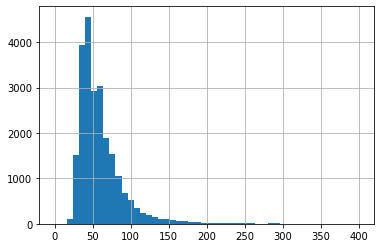

In [291]:
draw_hist('total_area', 0, 400)

Гистограмма по столбцу total_area выглядит правдоподобно - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 30-60 кв.м, также видим мощный пик у значения 45 кв.м. После значения 100 кв.м число квартир стремительно убывает.

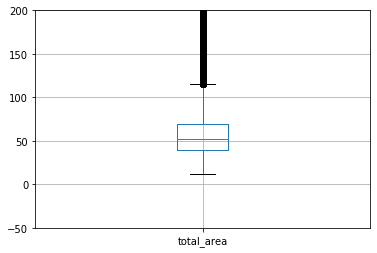

In [292]:
draw_boxplot('total_area')

Разброс нормальных значений начинается около 15 кв.м и заканчивается у 120 кв.м. Избавимся от всех выбивающихся значений.

In [293]:
real_estate = real_estate.query('total_area>=15 and total_area<=120')

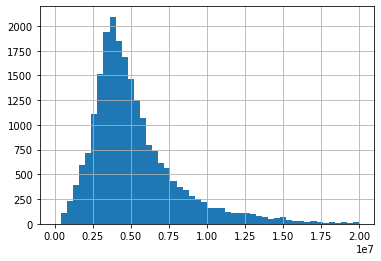

In [294]:
draw_hist('last_price', 0, 20000000)

График принимает ожидаемый вид. Можем отметить пик у значения цены 3 млн. Квартир, дороже 10 млн, гораздо меньше.

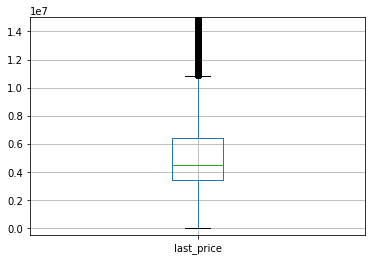

In [295]:
draw_boxplot('last_price', -500000, 15000000)

Нормальные значения находятся в интервале от нуля до 11 млн. Оставим только их. Но сначала проверим, нет ли в данных неочивидных выбросов - например, значений, меньших 10000.

In [296]:
real_estate.query('last_price < 10000')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_part,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type
101,79.0,79,1970-01-01 00:00:00.000000079,79.0,79.0,79,79.0,79.0,79.0,79.0,...,79.0,79.0,79.0,79.0,1.0,1,3,1,1970,последний


Это объявление определенно точно выглядит неправильно. Избавимся от него при фильтрации.

In [297]:
real_estate = real_estate.query('last_price>10000 and last_price<=11000000')

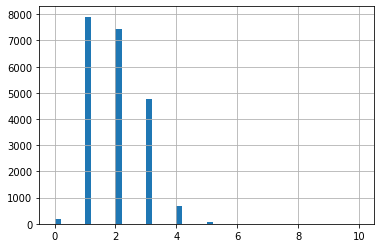

In [298]:
draw_hist('rooms', 0, 10)

У большинства квартир 1-3 комнаты. Видим небольшой сегмент с нулевым количеством комнат. Это студии.

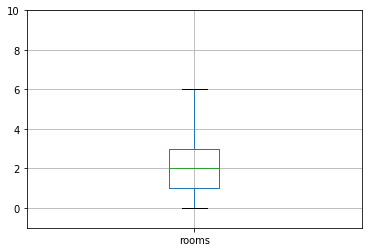

In [299]:
draw_boxplot('rooms', -1, 10)

Нормальные значения - от 0 до 6, оставим только их.

In [300]:
real_estate = real_estate.query('rooms>=0 and rooms <7')

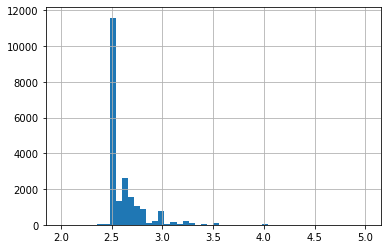

In [301]:
draw_hist('ceiling_height', 2, 5)

У большей части квартир высота потолков 2.5-2.7 м.

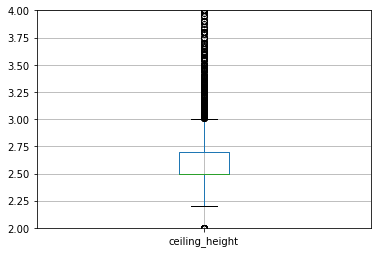

In [302]:
draw_boxplot('ceiling_height', 2, 4)

Избавимся от всех значений, меньших 2.2 и больших 3.

In [303]:
real_estate = real_estate.query('ceiling_height>=2.2 and ceiling_height <=3')

Построим гистограмму для времени продажи квартиры, изучим эти данные.

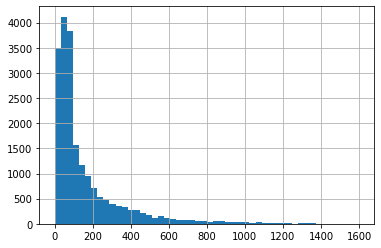

In [304]:
draw_hist('days_exposition', 0, 1600)

Ожидаемое распределение дней размещения — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. Вместо этого мы видим пик прямо рядом с нулём. Посмотрим, как выглядит диаграмма размаха для этих данных.

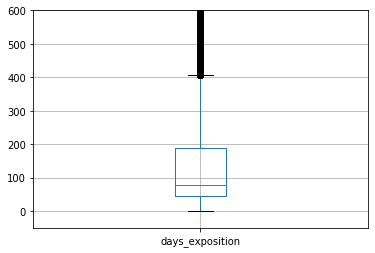

In [305]:
draw_boxplot('days_exposition', -50, 600)

Большая часть значений находится в диапазоне до 200 дней. Посмотрим на среднее и медиану.

In [306]:
real_estate['days_exposition'].describe()

count    20114.000000
mean       158.758551
std        197.813356
min          1.000000
25%         45.000000
50%         78.000000
75%        190.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно считать, что сделка прошла быстро, если продажа состоялась в срок до 45 дней после подачи объявления, а если сделка состоялась через 190 и больше дней - она длилась долго.

Разница среднего и медианы почти в два раза. Это говорит о том, что в распределении длинный хвост высоких значений, влияющих на среднее, но не на медиану. Действительно, видим, что третий квартиль у нас заканчивается на значении 199, а максимальное значение - целых 1580 дней. Как видим по графикам, нормальные значения находятся в промежутке от 0 до 410. Уберем из таблицы редкие и выбивающиеся значения. 

In [307]:
real_estate = real_estate.query('days_exposition>0 and days_exposition<=410')

Изучим, какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена квадратного метра от числа комнат и удалённости от центра? Также изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

In [308]:
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.05)

In [309]:
index = real_estate.index 
price_rooms_area_corr = real_estate.pivot_table(index=index, values=['total_area','rooms', 'sq_m_price'], aggfunc='mean')
price_rooms_area_corr.corr()

,rooms,sq_m_price,total_area
rooms,1.000000,-0.250831,0.802399
sq_m_price,-0.250831,1.000000,-0.111475
total_area,0.802399,-0.111475,1.000000


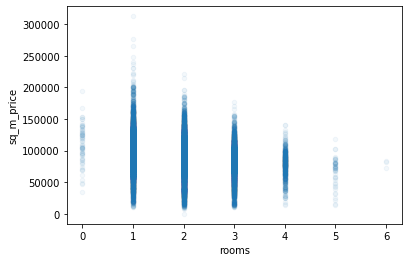

In [310]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'rooms')

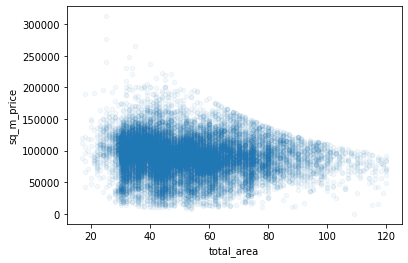

In [311]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'total_area')

Видим, что стоимость средне зависит от общей площади, и в меньшей степени от количества комнат. Как наблюдение - больше всего в таблице зависимость между количеством комнат и площадью, что достаточно логично.

Тем не менее, с увеличением количества комнат цена за кв.м падает. А если рассматриваем общую площадь, то стоимость за квадратный метр падает с каждым метром при увеличении площади после 60 кв.м

In [312]:
distance_from_center = real_estate.query('cityCenters_nearest != -1')
distance_from_center['sq_m_price'].corr(distance_from_center['cityCenters_nearest'])

-0.39062595192467753

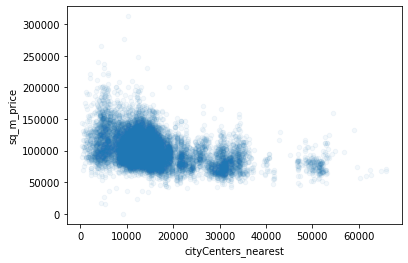

In [313]:
draw_plot(distance_from_center, 'sq_m_price', 'cityCenters_nearest')

Коэффициент корреляции отрицательный. Это значит, что увеличение расстояния от центра связано с уменьшением стоимости квартиры, что подтверждается на графике.

Посмотрим на взаимосвязь стоимости квартиры и этажа, на котором она расположена.

In [314]:
price_and_floor_types = real_estate.loc[:, ['floor_type', 'sq_m_price']]

price_and_floor_types_corr = price_and_floor_types.floor_type.str.get_dummies(sep=' ').corrwith(price_and_floor_types.sq_m_price)
price_and_floor_types_corr

другой       0.233641
первый      -0.177569
последний   -0.127888
dtype: float64

Видим, что квартиры, расположенные на первом и последнем этаже, стоят дешевле, чем на любом другом. 

С помощью метода heatmap из библиотеки seaborn визуалицируем корреляцию.

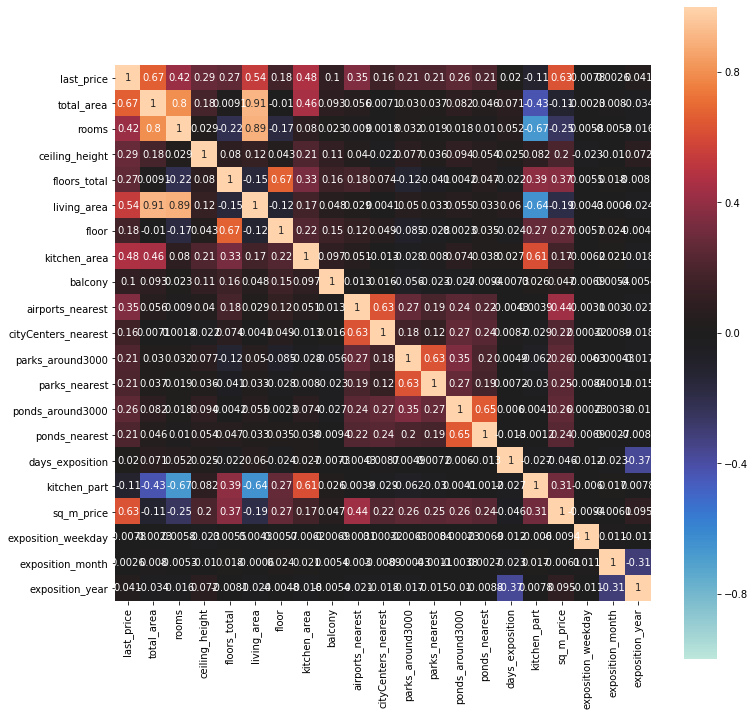

In [315]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(real_estate.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

 С помощью графика можем отметить, что сильнее всего связь у параметра sq_m_price с last_price(логично), общей и жилой площадью, площадью кухни, а так же инфраструктурой вокруг (парки, водоемы, аэропорты).

Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года.

In [316]:
exposition_date = real_estate.pivot_table(index=index, values=['exposition_weekday', 'exposition_month', 'exposition_year', 'sq_m_price'], aggfunc='mean')
exposition_date.corr()

,exposition_month,exposition_weekday,exposition_year,sq_m_price
exposition_month,1.000000,0.011393,-0.308506,-0.006109
exposition_weekday,0.011393,1.000000,-0.010807,-0.009439
exposition_year,-0.308506,-0.010807,1.000000,0.094735
sq_m_price,-0.006109,-0.009439,0.094735,1.000000


При взгляде на коэффициент корреляции год, день недели и месяц размещения практически не связаны со стоимостью квартир. Однако, связь здесь может быть нелинейной, поэтому взглянем на графики зависимости.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effbb591b10>,
      dtype=object)

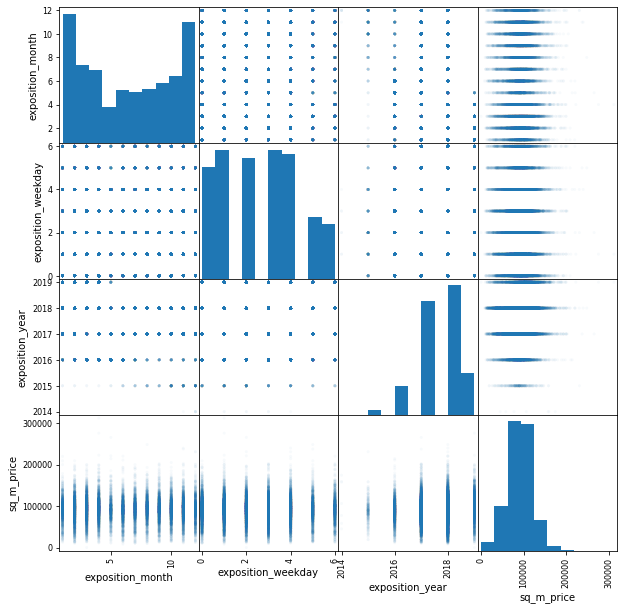

In [317]:
pd.plotting.scatter_matrix(exposition_date, figsize=(10, 10), alpha=0.03)

**Приходим к следующим выводам:**
 
 - Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных.
 - Квартиры, выставленные на продажу зимой, в декабре и январе, дороже всего. Дешевле всего - в мае.
 - Можем отметить тенденцию роста цен от года к году, однако дороже всего квартиры стоили в 2018.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

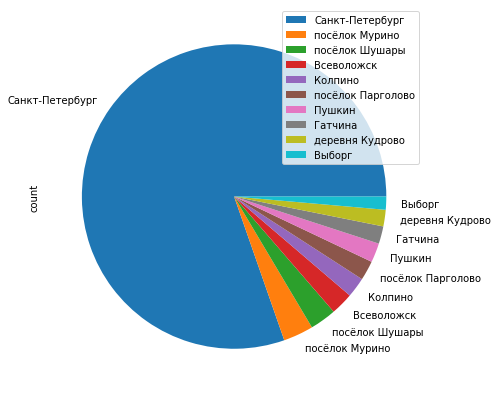

In [318]:
locality_sq_m_price = real_estate.loc[:, ['locality_name', 'sq_m_price']]
locality_sq_m_price = locality_sq_m_price.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'mean'])
locality_sq_m_price.columns = ['count', 'mean_sq_m_price']
top10_locality = locality_sq_m_price.sort_values(by='count', ascending=False).head(10)
top10_locality.plot(y='count', kind='pie', figsize=(7, 7))

In [319]:
top10_locality

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,11382,104919.806537
посёлок Мурино,453,85348.132450
посёлок Шушары,397,78394.554156
Всеволожск,339,67351.123894
Колпино,302,75201.735099
посёлок Парголово,294,89988.336735
Пушкин,290,99834.193103
Гатчина,263,68807.247148
деревня Кудрово,249,92588.578313


Дороже всего кадратный метр стоит в Санкт-Петербурге (что неудивительно) и в Пушкине. Дешевле всего квартиру можно купить в Выборге.

Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра. 

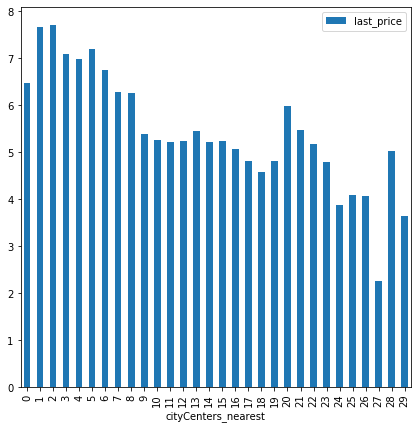

In [320]:
flats_in_spb = real_estate.query('locality_name == "Санкт-Петербург"')
flats_in_spb = flats_in_spb.query('cityCenters_nearest != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['locality_name', 'cityCenters_nearest','last_price']]
#приводим расстояние в км, округляем
flats_in_spb_price['cityCenters_nearest'] = (flats_in_spb_price['cityCenters_nearest']/1000).round().astype(int)
#приводим цену в млн
flats_in_spb_price['last_price'] = flats_in_spb_price['last_price']/1000000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))
flats_in_spb_pivot.plot(y='last_price', kind='bar', figsize=(7, 7))

Начиная с третьего километра цена сильно падает. С 4 по 7 километры также есть небольшой всплеск стоимости. Будем считать центром километры с 0 по 2 включительно.

Выделим сегмент квартир в центре Санкт-Петербурга.

In [321]:
flats_in_spb_center = flats_in_spb.query('cityCenters_nearest != -1')
flats_in_spb_center['cityCenters_nearest'] = (flats_in_spb_center['cityCenters_nearest']/1000).round().astype(int)
flats_in_spb_center = flats_in_spb_center.query('cityCenters_nearest < 3')

In [322]:
def draw_hist_spb(col, xmin=0, xmax=7):
    flats_in_spb_center[col].hist(bins=50, range=(xmin,xmax))

Для этой территории изучим следующие параметры: площадь, цена, число комнат, высота потолков.

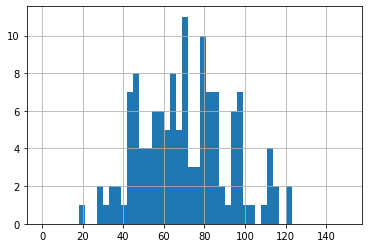

In [323]:
draw_hist_spb('total_area', xmax=150)

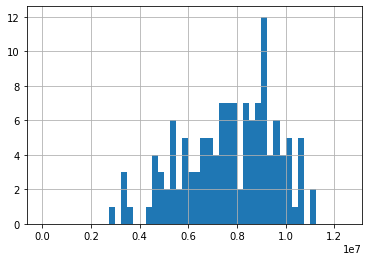

In [324]:
draw_hist_spb('last_price', xmax=12500000)

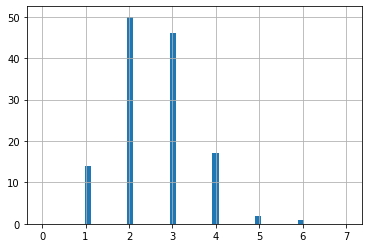

In [325]:
draw_hist_spb('rooms')

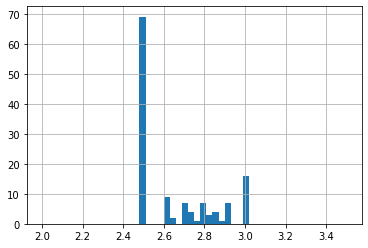

In [326]:
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

**О квартирах в центре Санкт-Петербурга можем сделать следующие выводы:**

- они имеют бОльшую площадь - 70-80 кв.м (против 45-50 кв.м);
- их стоимость гораздо больше - если на общем графике пиковое значение цены было 3 млн, то здесь это значение почти в 3 раза больше;
- количество комнат в них больше - в основном, 2-4 комнаты (против 1-3);
- потолки выше - помимо медианного значения 2.5, видим пик у значения 3

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [327]:
flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['rooms'])

-0.3848865880391734

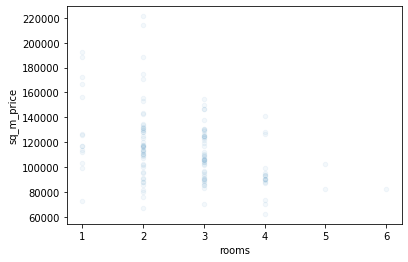

In [328]:
draw_plot(flats_in_spb_center,'sq_m_price','rooms')

В центре Санкт-Петербурга стоимость квартиры и количество комнат связаны больше. С увеличением комнат в квартире стоимость квадратного метра уменьшается.

In [329]:
flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['cityCenters_nearest'])

-0.003493402124941819

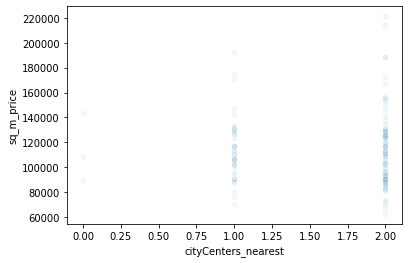

In [330]:
draw_plot(flats_in_spb_center,'sq_m_price','cityCenters_nearest')

Взаимосвязь этих двух параметров в центре С-П совсем маленькая. У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры одинаково дорогие на километрах 0-2.

In [331]:
flats_in_spb_center_floor_types = flats_in_spb_center.loc[:, ['floor_type', 'sq_m_price']]

flats_in_spb_center_floor_types_corr = flats_in_spb_center_floor_types.floor_type.str.get_dummies(sep=' ').corrwith(flats_in_spb_center_floor_types.sq_m_price)
flats_in_spb_center_floor_types_corr

другой       0.217005
первый      -0.146380
последний   -0.107166
dtype: float64

Квартиры на первом и последнем этаже также дешевле, взаимосвязь на том же уровне.

In [332]:
index1 = flats_in_spb_center.index
exposition_date_spb = flats_in_spb_center.pivot_table(index=index1, values=['exposition_weekday', 'exposition_month', 'exposition_year', 'sq_m_price'], aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effbac182d0>,
      dtype=object)

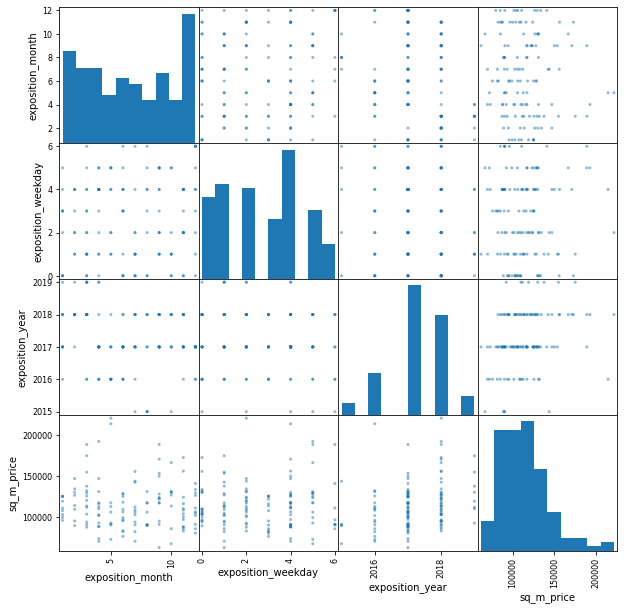

In [333]:
pd.plotting.scatter_matrix(exposition_date_spb, figsize=(10, 10))

 **Выводы:**
 
 - Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных, как и в предыдущем исследовании.
 - Квартиры, выставленные на продажу в декабре и январе, дороже всего. Дешевле всего - в мае, сентябре и ноябре.
 - Дороже всего квартиры стоили в 2017 и 2018 годах.

### Шаг 5. Общий вывод

Изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, что впоследствии поможет определять рыночную стоимость объектов недвижимости. 

- заполнили пропущенные данные в исследуемых столбцах
- установили параметры (площадь, цена, число комнат, высота потолков и др.)
- установили связь между разными параметрами и построили графики
- избавились от редких и выбивающихся значений
- ответили на поставленные вопросы

**Пришли к выводам:**
- от дня размещения объявления до продажи квартиры обычно проходит 90-100 дней;
- дороже всего кадратный метр стоит в Санкт-Петербурге и в Пушкине, дешевле всего квартиру можно купить в Выборге;
- квартиры на первом и последнем этаже дешевле, чем на любом другом;
- отдаление от центра города связано с уменьшением стоимости недвижимости, при этом центральной цасти С-П это не касается - здесь квартиры одинаково дорогие;
- квартиры в центре С-П имеют бОльшую площадь, чем в других районах и населенных пунктах;
- стоимость квартир в центре С-П гораздо больше - почти в 3 раза;
- количество комнат в квартирах в центре С-П больше - в основном, 2-4 комнаты (против 1-3), потолки выше;
- обнаружилась следующая cвязь между временем размещения объявления и стоимостью квартиры: квартиры, выставленные на продажу в декабре и январе дороже, чем в другие месяцы; квартиры, выставленные на продажу на выходных, дешевле, чем в другие дни недели; квартиры были дороже всего в 2017 и 2018 году для центра С-П и в 2018 для всех остальных районов и населенных пунктов.